In [1]:
%pip install yfinance
#remember to restart the kernel after using pip

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 15.2 MB/s eta 0:00:000:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 2.1 MB/s eta 0:00:00.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 62.3 MB/s eta 0:00:00 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 2.6 MB/s eta 0:00:00.0 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 3.9 MB/s eta 0:00:00.8 MB/s eta 0:00:01
  Created wheel for peewee: filename=peewee-3.18.2-cp310-cp310-linux_x86_64.whl size=318061 sha256=d4b3707465267130f704f92644c62f496c1b70101ed1cfe0925f74ab3b92230a
  Stored in directory: /home/8e6871ea-9e76-4029-849d-302a75dfa8e7/.cache/pip/wheels/29/22/6c/745744e946d21

In [5]:
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

# Define date range
start = dt.date(2025, 5, 1)
end = dt.date(2025, 5, 15)

# Download stock data
stocks = 'AAPL'
#place to store 
df = yf.download(stocks, start=start, end=end, auto_adjust=False)
df
#dates are indexes, only trading days
#adjusted closed price - after dividends
#auto_adjust=False include this, otherwise closed column is already adjusted
#find the day where closed=adj_closed

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2025-05-01,213.040634,213.320007,214.559998,208.899994,209.080002,57365700
2025-05-02,205.081070,205.350006,206.990005,202.160004,206.089996,101010600
2025-05-05,198.629532,198.889999,204.100006,198.210007,203.100006,69018500
2025-05-06,198.250015,198.509995,200.649994,197.020004,198.210007,51216500
2025-05-07,195.992981,196.250000,199.440002,193.250000,199.169998,68536700
2025-05-08,197.231369,197.490005,200.050003,194.679993,197.720001,50478900
2025-05-09,198.270004,198.529999,200.539993,197.539993,199.000000,36453900
2025-05-12,210.789993,210.789993,211.270004,206.750000,210.970001,63775800


In [6]:
#2025-05-12 ex-dividend date for Apple - from AAPL Dividend History Nasdaq => that's why adjusted closed and closed are the same
#before ex-dividend date the stock price was decreasing 

In [8]:
# Define date range
start = dt.date(2005, 1, 1)
end = dt.datetime.now()

# Download stock data
stocks = 'AAPL'
#place to store 
df = yf.download(stocks, start=start, end=end, auto_adjust=False)['Adj Close']
df
#['Adj Close'] - specification that you only need adj closed column

[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2005-01-03,0.951065
2005-01-04,0.960833
2005-01-05,0.969248
2005-01-06,0.969999
2005-01-07,1.040626
...,...
2025-07-11,211.160004
2025-07-14,208.619995
2025-07-15,209.110001


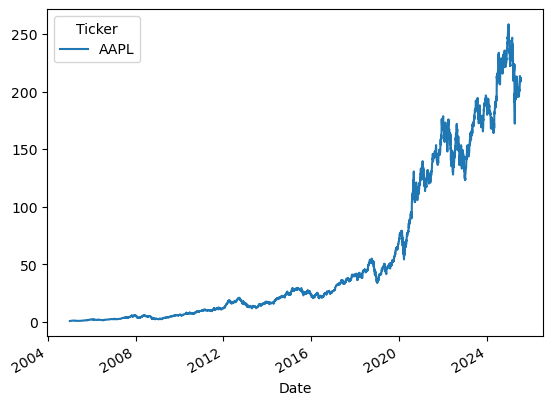

In [9]:
#Visualization of absolute price changes
df.plot()
plt.show()

In [12]:
#Relative price changes
daily_returns = df.pct_change()
daily_returns

Ticker,AAPL
Date,
2005-01-03,NaN
2005-01-04,0.010270
2005-01-05,0.008758
2005-01-06,0.000775
2005-01-07,0.072812
...,...
2025-07-11,-0.005885
2025-07-14,-0.012029
2025-07-15,0.002349


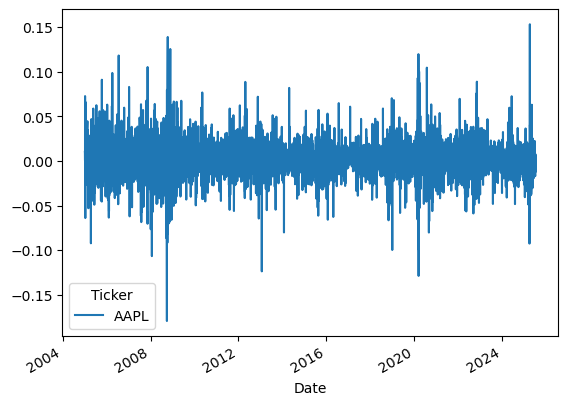

In [13]:
#Visualization of volatility
daily_returns.plot()
plt.show()

In [15]:
#Comparing 2 stocks now
# Download stock data
stocks_1 = ['AAPL', 'MSFT']
#place to store 
dr = yf.download(stocks_1, start=start, end=end, auto_adjust=False)['Adj Close']
dr

[*********************100%***********************]  2 of 2 completed


Ticker,AAPL,MSFT
Date,,
2005-01-03,0.951065,18.485220
2005-01-04,0.960832,18.554358
2005-01-05,0.969248,18.512878
2005-01-06,0.969999,18.492138
2005-01-07,1.040626,18.436836
...,...,...
2025-07-11,211.160004,503.320007
2025-07-14,208.619995,503.019989
2025-07-15,209.110001,505.820007


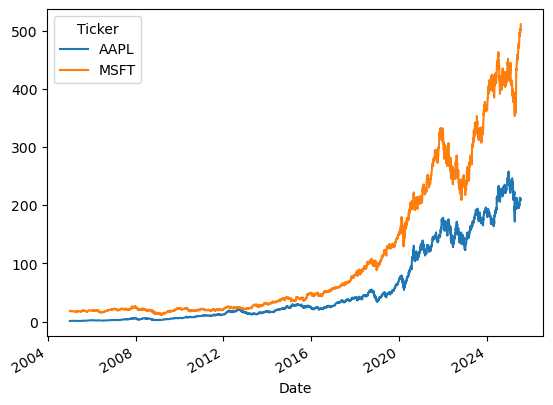

In [16]:
#Visualization of absolute price changes
dr.plot()
plt.show()

In [17]:
#Relative price changes
daily_returns_1 = dr.pct_change()
daily_returns_1

Ticker,AAPL,MSFT
Date,,
2005-01-03,NaN,NaN
2005-01-04,0.010269,0.003740
2005-01-05,0.008759,-0.002236
2005-01-06,0.000775,-0.001120
2005-01-07,0.072811,-0.002991
...,...,...
2025-07-11,-0.005885,0.003669
2025-07-14,-0.012029,-0.000596
2025-07-15,0.002349,0.005566


In [18]:
#cumulate them
#lets you turn daily % returns into a cumulative performance curve — the kind you see in backtests, equity curves, or fund performance charts.
daily_cum_returns = (daily_returns_1+1).cumprod()
daily_cum_returns

Ticker,AAPL,MSFT
Date,,
2005-01-03,NaN,NaN
2005-01-04,1.010269,1.003740
2005-01-05,1.019118,1.001496
2005-01-06,1.019908,1.000374
2005-01-07,1.094169,0.997383
...,...,...
2025-07-11,222.024688,27.228240
2025-07-14,219.353990,27.212010
2025-07-15,219.869208,27.363483


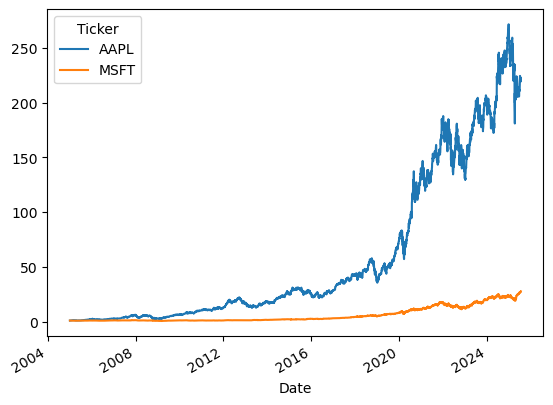

In [19]:
daily_cum_returns.plot()
plt.show()